## Assignment 4
#### TaiHsuan Wu 2524355409

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, confusion_matrix

### Question 1

In [3]:
df = pd.read_csv('Hitters.csv')

In [4]:
# drop the NA rows of salary
d0 = df.dropna()

In [5]:
y1 = d0.Salary

In [6]:
x1 = d0.drop(['Salary'],axis = 1)

In [7]:
# get dummy of 'League','Division','NewLeague'
x1[['League','Division','NewLeague']] = pd.get_dummies(x1[['League','Division','NewLeague']],drop_first=True)

In [8]:
# take int64 to float64
X1 = x1.astype('float64')

In [9]:
#  Divide the data set into a training and a test set(50%)

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.5,
                                                test_size=0.5, random_state = 1)

#### a. ) Fit a Random Forest model wiht B=100 bagged trees and max_features = 10. Report the test MSE. Which predictors are most important? 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [12]:
bagged = RandomForestRegressor(max_features=10, n_estimators = 100,
                                     random_state=1)

In [13]:
bagged.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [14]:
pred = bagged.predict(X1_test)

In [15]:
# MSE
mean_squared_error(y1_test, pred)

65737.14467180798

In [16]:
r_import = bagged.feature_importances_*100

In [17]:
r_imp = pd.DataFrame({'Importance':r_import},index = X1.columns)
r_imp.sort_values(by=['Importance'], inplace=True, ascending=False)
r_imp.head()

,Importance
CRBI,12.929066
RBI,11.500127
CHits,11.350808
CRuns,8.623195
PutOuts,7.454813


ANS: <br>The most three important predictors is CRBI, RBI, CHits<br>
     MSE: 65737.14467180798

#### b. ) Fit a Gradient boosting model with 100 trees and learning rate 0.10 and max_depth = 4. Report the test MSE. Which predictors are most important?

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
boosted = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.10,
                                          max_depth = 4, random_state =1)

In [20]:
boosted.fit(X1_train,y1_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [21]:
pred_b = boosted.predict(X1_test)

In [22]:
# MSE
mean_squared_error(y1_test, pred_b)

92293.03499192445

In [23]:
b_import = boosted.feature_importances_*100
b_imp = pd.DataFrame({'Importance':b_import},index = X1.columns)
b_imp.sort_values(by=['Importance'], inplace=True, ascending=False)
b_imp.head()

,Importance
CRBI,10.749856
Hits,10.523893
RBI,9.923258
CHits,9.148919
CHmRun,7.127203


Ans:<br> The most three important predictor is CRBI, Hits, RBI<br> MSE: 92293.03499192445

#### c. ) Fit a multiple linear regression model with the most important predictors found by the Random Forest. Find the test MSE.

In [24]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
x1_c = X1_train[['CRBI', 'RBI']]
y1_c = y1_train

In [26]:
mlr = LinearRegression().fit(x1_c, y1_c)

In [28]:
mse = mean_squared_error(y1_test, mlr.predict(X1_test[['CRBI', 'RBI']]))

In [29]:
mse

112776.06879286647

ANS:<br> MSE: 112776.06879286647

### Question 2

In [30]:
df2 = pd.read_csv('bodyfat.csv')
d2 = df2.copy()

In [31]:
y2 = d2.bodyfat
x2 = d2.drop(['bodyfat'],axis = 1)

#### a.) Find the correlation matrix rXX for the predictors. Which predictors show low correlation? Fit a linear regression of midarm circumference as a function of the other two predictors. Report the R2. Is midarm circumference linearly related to the other predictors?

In [32]:
c = x2.corr()
c.style.background_gradient().set_precision(2)

,skinfold,thigh,midarm
skinfold,1,0.92,0.46
thigh,0.92,1,0.085
midarm,0.46,0.085,1


In [33]:
# midarm shows really low correlation

In [34]:
y_x = x2.midarm
a_x = x2.drop(['midarm'],axis = 1)

In [35]:
a_X = sm.add_constant(a_x)

In [36]:
m2 = sm.OLS(y_x, a_X).fit()

In [37]:
pred_2a = m2.get_prediction(a_X)

In [38]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 midarm   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     880.7
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           6.82e-18
Time:                        14:03:23   Log-Likelihood:                -7.2427
No. Observations:                  20   AIC:                             20.49
Df Residuals:                      17   BIC:                             23.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3308      1.239     50.293      0.000      59.716      64.946
skinfold       1.8809      0.045     41.816      0.000       1.786       1.976
thigh         -1.6085      0.043    -37.264      0.000      -1.700      -1.517
==============================================================================
Omnibus:                        3.956   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.402
Skew:                          -0.076   Prob(JB):                        0.496
Kurtosis:                       1.712   Cond. No.                         846.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ANS:<br>
midarm = 62.3308 + 1.8809*skinfold - 1.6085*thigh<br>
According to correlation midarm have low correlation with other two.<br>
According to R-squared(99%) midarm circumference is linearly related to the other predictors.

#### b. ) The VIF values for a linear regression model are the diagonal elements of r−1XX. For a ridge regression model the VIF values are the diagonal elements of function. For each predictor plot the VIF values as a function of α where α is in (0,1) with increments equal to 0.01 (all curves on the same plot, different color). Plot should include a legend.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

In [40]:
al = np.linspace(0, 1, 100, endpoint = False)

In [41]:
al

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [42]:
a = np.eye(c.shape[1])
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
VIF = []
for i in al:
    VIF.append(np.linalg.inv(c + i*a).diagonal())

In [44]:
vi = np.asarray(VIF)
VIF2 = pd.DataFrame(vi, columns=x2.columns, index=al)

In [45]:
vifs = pd.Series(np.linalg.inv(c.values).diagonal(), index=c.index)

In [46]:
vifs

skinfold    708.842914
thigh       564.343386
midarm      104.606005
dtype: float64

In [47]:
VIF2 = VIF2.drop([0.00])

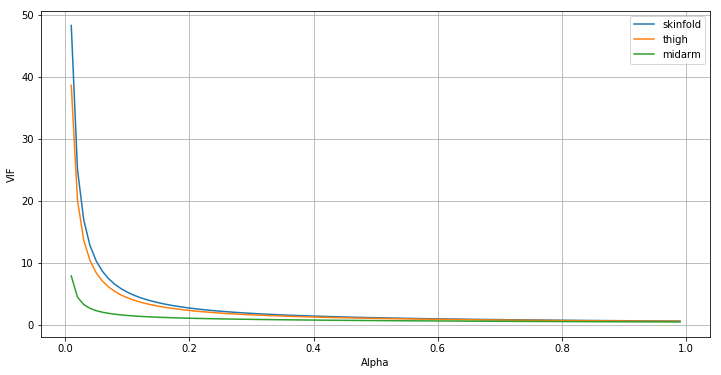

In [48]:
plt.figure(figsize=(12, 6))

for i in range(3):
    plt.plot(VIF2[VIF2.columns[i]], label = VIF2.columns[i])
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("VIF")
plt.grid()

### Question 3

In [49]:
df3 = pd.read_csv('caravan.csv')

In [50]:
q3 = df3.copy()

In [51]:
q3[['Purchase']] = pd.get_dummies(q3[['Purchase']],drop_first=True)

In [52]:
y3 = q3.Purchase

In [53]:
x3 = q3.drop(['Purchase'],axis = 1)

In [65]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 1000,
                                                test_size=len(x3)-1000, random_state = 0)

#### a. ) Show that the variables PVRAAUT and AVRAAUT are highly unbalanced (having most rows belonging to a few categories). Remove these variables from the dataset.

In [66]:
from collections import Counter

In [67]:
x3.PVRAAUT.value_counts()

0    5813
6       7
9       1
4       1
Name: PVRAAUT, dtype: int64

In [68]:
x3.AVRAAUT.value_counts()

0    5813
1       6
2       2
3       1
Name: AVRAAUT, dtype: int64

In [69]:
dicts = {}

for col in x3.columns:
    dicts[col] = x3[col].value_counts()

In [70]:
x3_r = x3.drop(['PVRAAUT', 'AVRAAUT'],axis = 1)

#### b) Fit a random forest model with 500 trees and max_features = 29 to the training set with Purchase as the response and the other variables as predictors. What predictor appears to be the most important? Report the test accuracy rate.

In [71]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [72]:
random3 = RandomForestClassifier(max_features=29, n_estimators = 500,
                                     random_state=1)

In [73]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x3_r, y3, train_size = 1000,
                                                test_size=len(x3)-1000, shuffle = False)

In [74]:
random3.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=29, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [75]:
r3_import = random3.feature_importances_*100

In [76]:
r3_imp = pd.DataFrame({'Importance':r3_import},index = x3_r.columns)
r3_imp.sort_values(by=['Importance'], inplace=True, ascending=False)
r3_imp.head()

,Importance
PPERSAUT,3.426791
MOSTYPE,3.333823
MGODGE,3.302695
MOPLHOOG,3.024537
PBRAND,2.804189


ANS: <br>PPERSAUT is the most important predictor.

In [77]:
# accuracy rate of train
random3.score(X3_train,y3_train)

0.999

In [78]:
pred3 = random3.predict(X3_test)

In [79]:
mat3 = confusion_matrix(y3_test,pred3.round())
mat3

array([[4481,   52],
       [ 277,   12]])

In [80]:
cm = pd.DataFrame(mat3,index = ['No','Yes'],columns = ['No','Yes'])
cm

,No,Yes
No,4481,52
Yes,277,12


In [81]:
sum1 = cm.values.sum()
(4481+12)/sum1

0.9317710493571132

ANS:<br>
PPERSAUT is the most important predictor.<br>
The test accuracy rate: 0.9317710493571132

#### c) Fit a boosting model to the training set with max_depth = 4 and Purchase as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. What predictor appears to be the most important? Report the test accuracy rate.

In [82]:
boosted3 = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01,
                                          max_depth = 4, random_state =1)

In [83]:
boosted3.fit(X3_train,y3_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [84]:
b3_import = boosted3.feature_importances_*100
b3_imp = pd.DataFrame({'Importance':b3_import},index = x3_r.columns)
b3_imp.sort_values(by=['Importance'], inplace=True, ascending=False)
b3_imp.head()

,Importance
MOSTYPE,6.201879
PPERSAUT,4.940997
MKOOPKLA,4.383142
MOPLHOOG,3.972672
PWAPART,3.903746


MOSTYPE is the most important predictor

In [85]:
# accuracy rate of train
boosted3.score(X3_train,y3_train)

0.983

In [86]:
pred3c = boosted3.predict(X3_test)

In [87]:
mat3c = confusion_matrix(y3_test,pred3c.round())
mat3c

array([[4489,   44],
       [ 277,   12]])

In [88]:
cm = pd.DataFrame(mat3c,index = ['No','Yes'],columns = ['No','Yes'])
cm

,No,Yes
No,4489,44
Yes,277,12


In [89]:
(4489+12)/cm.values.sum()

0.9334301119867275

ANS:<br>
MOSTYPE is the most important predictor. <br>
The test accuracy rate: 0.9334301119867275

#### d. ) Report the test accuracy rate when KNN (with n_neighbors = 3) is used to predict Purchase.

In [90]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [92]:
knn.fit(X3_train,y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
# accuracy rate of train
knn.score(X3_train,y3_train)

0.95

In [94]:
pred3d = knn.predict(X3_test)

In [95]:
mat3d = confusion_matrix(y3_test,pred3d.round())
mat3d

array([[4463,   70],
       [ 279,   10]])

In [96]:
cm3d = pd.DataFrame(mat3d,index = ['No','Yes'],columns = ['No','Yes'])
cm3d

,No,Yes
No,4463,70
Yes,279,10


In [97]:
(4463+10)/cm3d.values.sum()

0.9276233927830776

ANS: <br>
The test accuracy rate: 0.9276233927830776

#### e. ) Report the test accuracy rate when logistic regression is used to predict Purchase.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [99]:
sc = StandardScaler()

In [100]:
sc.fit(X3_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
X3_train_std = sc.transform(X3_train)

In [102]:
X3_test_std = sc.transform(X3_test)

In [114]:
lr = LogisticRegression(solver='lbfgs')

In [115]:
lr.fit(X3_train_std, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
pred3e = lr.predict(X3_test_std)

In [117]:
mat3e = confusion_matrix(y3_test,pred3e.round())
mat3e

array([[4489,   44],
       [ 274,   15]])

In [118]:
cm3e = pd.DataFrame(mat3e,index = ['No','Yes'],columns = ['No','Yes'])
cm3e

,No,Yes
No,4489,44
Yes,274,15


In [119]:
(4489+15)/cm3e.values.sum()

0.9340522604728329

In [120]:
lr.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
pred3e2 = lr.predict(X3_test)

In [122]:
mat3e2 = confusion_matrix(y3_test,pred3e2.round())
mat3e2

array([[4494,   39],
       [ 278,   11]])

In [123]:
cm3e2 = pd.DataFrame(mat3e2,index = ['No','Yes'],columns = ['No','Yes'])
cm3e2

,No,Yes
No,4494,39
Yes,278,11


In [124]:
(4494+11)/cm3e2.values.sum()

0.9342596433015347

ANS:<br>
If scale the data, the test accuracy rate: 0.9340522604728329<br>
If not scale the data set, the test accuracy rate: 0.9342596433015347